In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
pd.set_option('display.max_columns', None)

#Data = pd.read_csv("smalldata.csv")
Data = pd.read_csv("../Data/300k.csv")
#print(Data.head())

#Steage 1
#Selection = ['pokemonId', 'latitude', 'longitude', 'appearedLocalTime','appearedTimeOfDay', 'appearedHour','appearedMinute',\
#             'appearedDay',  'appearedMonth',  'appearedYear','terrainType', 'closeToWater', 'gymDistanceKm','city', 'continent','weather', 'temperature', \
#             'windSpeed', 'windBearing', 'pressure','class' ]
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedHour','appearedMinute','city',\
            'terrainType', 'closeToWater', 'gymDistanceKm','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure',\
            'class' ]
ReducedData = Data.loc[:, Selection]
ReducedData.head()

C:\WorkSpace\Python\Big Data\project\venv\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude,appearedHour,appearedMinute,city,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,Mexico_City,14,False,0.049869,Foggy,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,Mexico_City,14,False,0.259156,Foggy,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,New_York,13,False,0.489886,Clear,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,Los_Angeles,0,True,0.359309,PartlyCloudy,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,Los_Angeles,0,True,0.210543,PartlyCloudy,15.6,5.84,160,1020.52,133


In [161]:
ReducedData['weather']= ReducedData['weather'].astype('category')
catedict = dict(enumerate(ReducedData['weather'].cat.categories))
ReducedData['weather'] = ReducedData['weather'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,11,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,11,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,4,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,20,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,20,15.6,5.84,160,1020.52,133


In [162]:
ReducedData['closeToWater'] = ReducedData['closeToWater'].astype('category')
catedict2 = dict(enumerate(ReducedData['closeToWater'].cat.categories))
ReducedData['closeToWater'] = ReducedData['closeToWater'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,0,0.049869,11,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,0,0.259156,11,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,0,0.489886,4,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,1,0.359309,20,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,1,0.210543,20,15.6,5.84,160,1020.52,133


In [163]:
Datamaxtrix = ReducedData.as_matrix()

C:\WorkSpace\Python\Big Data\project\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [164]:
x = np.array(Datamaxtrix[:,3:-1])
y = np.array(Datamaxtrix[:,1:3])
print(np.shape(x))
print(np.shape(y))

(296021, 10)
(296021, 2)


In [170]:
sample_numbers = np.shape(x)[0]
randomindex = np.random.choice(sample_numbers, sample_numbers, replace=False)

In [175]:
#Reindex
x = x[randomindex,:]
y = y[randomindex,:]
#Split into Training and Testing
ratio = 0.7
train_numbers = int(ratio * sample_numbers)
test_numbers = sample_numbers - train_numbers 
feature_train = x[0:train_numbers,:]
feature_test = x[train_numbers:sample_numbers,:]
label_train = y[0:train_numbers,:]
label_test = y[train_numbers:sample_numbers,:]
print(np.shape(feature_train),np.shape(label_train))
print(np.shape(feature_test),np.shape(label_test))

(207214, 10) (207214, 2)
(88807, 10) (88807, 2)


In [177]:
#Convert data to 1 dimension to fit for GradientBoostingRegressor
latitude_train = label_train[:,0]
longitude_train = label_train[:,1]
latitude_test = label_test[:,0]
longitude_test = label_test[:,1]
print(np.shape(latitude_train),np.shape(longitude_train),np.shape(latitude_test),np.shape(longitude_test))

(207214,) (207214,) (88807,) (88807,)


In [147]:
from sklearn import ensemble

      Iter       Train Loss   Remaining Time 
         1         267.3199            4.36m
         2         249.2744            4.40m
         3         233.7533            4.42m
         4         220.8856            4.37m
         5         210.6935            4.34m
         6         202.1137            4.32m
         7         194.4644            4.30m
         8         186.3861            4.29m
         9         181.2071            4.28m
        10         176.2974            4.26m
        20         133.2665            4.41m
        30         111.8070            4.65m
        40          97.7165            4.48m
        50          88.4589            4.34m
        60          81.4214            4.16m
        70          76.6419            3.99m
        80          72.2078            3.82m
        90          69.3011            3.67m
       100          66.7321            3.53m
       200          47.8790            2.49m
       300          37.5755            1.62m
       40

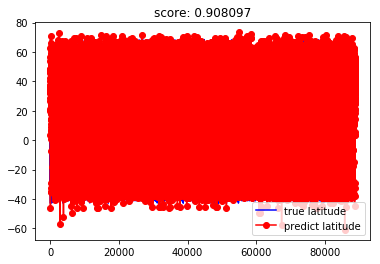

In [204]:
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(max_depth=5,n_estimators=500,learning_rate=0.1,verbose=1)
model = model_GradientBoostingRegressor
model.fit(feature_train,latitude_train)
score = model.score(feature_test,latitude_test)

result = model.predict(feature_test)
plt.figure()
plt.plot(np.arange(len(result)), latitude_test,'b',label='true latitude')
plt.plot(np.arange(len(result)),result,'ro-',label='predict latitude')
plt.title('score: %f'%score)
plt.legend()

In [205]:
Predict_latitude = pd.DataFrame(result)
#Predict_latitude.shape
True_latitude = pd.DataFrame(latitude_test)
#True_latitude.shape
Predict_latitude.to_csv("../Result/predict_latitude.csv")
True_latitude.to_csv("../Result/true_latitude.csv")

      Iter       Train Loss   Remaining Time 
         1        4238.8538            5.44m
         2        3961.0445            5.06m
         3        3722.2673            4.89m
         4        3520.5390            4.83m
         5        3327.5254            4.77m
         6        3198.3267            4.71m
         7        3071.8478            4.68m
         8        2939.0381            4.65m
         9        2832.6562            4.76m
        10        2737.3891            4.72m
        20        2144.9172            4.66m
        30        1816.4329            4.57m
        40        1567.8669            4.32m
        50        1422.4382            4.12m
        60        1338.6329            3.93m
        70        1264.7955            3.79m
        80        1190.8138            3.66m
        90        1142.0599            3.53m
       100        1077.9146            3.43m
       200         769.8165            2.57m
       300         590.8441            1.72m
       40

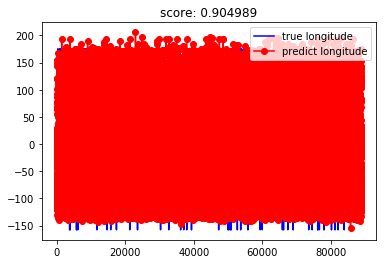

In [202]:
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(max_depth=5,n_estimators=500,learning_rate=0.1,verbose=1)
model = model_GradientBoostingRegressor
model.fit(feature_train,longitude_train)
score = model.score(feature_test, longitude_test)
result = model.predict(feature_test)
print(np.shape(result))
plt.figure()
plt.plot(np.arange(len(result)), longitude_test,'b',label='true longitude')
plt.plot(np.arange(len(result)),result,'ro-',label='predict longitude')
plt.title('score: %f'%score)
plt.legend()

In [206]:
Predict_longitude = pd.DataFrame(result)
#Predict_latitude.shape
True_longitude = pd.DataFrame(longitude_test)
#True_latitude.shape
Predict_longitude.to_csv("../Result/predict_longitude.csv")
True_longitude.to_csv("../Result/true_longitude.csv")

In [193]:
city = ReducedData['city']
city.to_csv("../Result/city.csv",header = True)
True_longitude_latitude = ReducedData['latitude','longitude']